In [1]:
#Importing libraries
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import numpy as np
from sklearn.mixture import GaussianMixture

In [2]:
#Our dataset
df = pd.read_csv('Wine.csv')

In [3]:
#Removing Customer Segment column
df = df.drop(['Customer_Segment'], axis = 1)

In [4]:
#All our columns are in numeric form
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
#Standardizing features 
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(df)

In [7]:
def draw_silhouette_plot(X,model, n_clusters):
    if model == KMeans:
        clusterer = model(n_clusters = n_clusters, random_state=69)
    elif model == GaussianMixture:
        clusterer = GaussianMixture(n_components = n_clusters, random_state=69)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    #Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    #The Silhouette Score ranges from -1 to 1
    plt.xlim([-1, 1])
    #The n_clusters + 1 * 10 is for insterting black space between plots
    #to demarcate them clearly
    plt.ylim([0, len(X) + (n_clusters + 1 ) * 10])
    plt.yticks ([]) # Clear the yaris labels
    plt.xticks ([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort ()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color , edgecolor=color , alpha=0.7)
        # Compute the new y-lower for next plot
        y_lower = y_upper + 10 # 10 for the 0 samples
    # The vertical line for the average silhouette score of all the values
    plt.axvline (x=silhouette_avg, color="red", linestyle="-")
    plt.title(f'The Silhouette Plot for n_clusters = {n_clusters}')
    plt.legend(['Silhouette Score'] + [f'Cluster {i}' for i in range(n_clusters)])


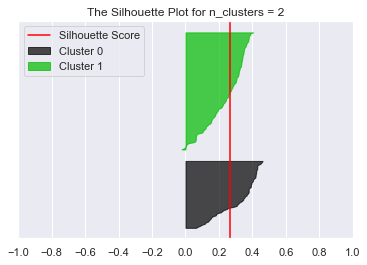

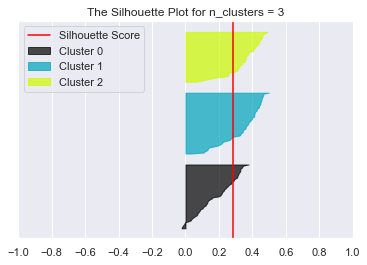

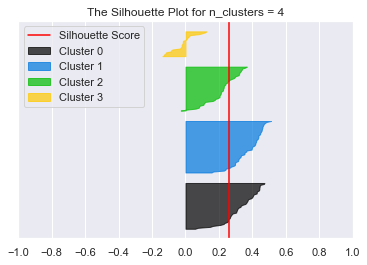

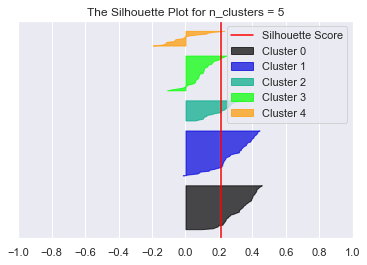

In [8]:
#Plotting Sihlouette Score with KMeans algorithm for n_clusters = 2, 3, 4 and 5
from pylab import figure
for i, k in enumerate([2, 3, 4, 5]):
    figure(i)
    draw_silhouette_plot(X, KMeans, k)

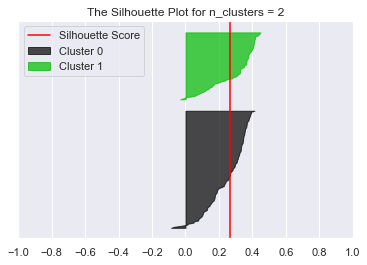

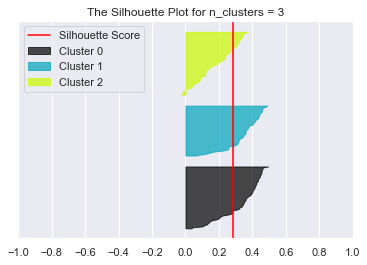

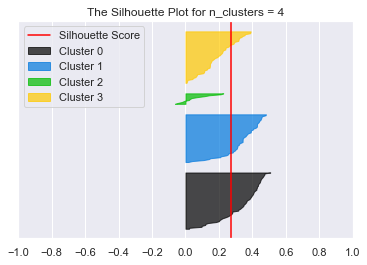

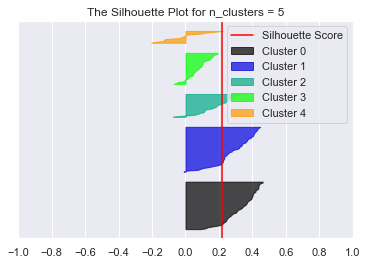

In [9]:
#Plotting Sihlouette Score with GMM algorithm for n_clusters = 2, 3, 4 and 5
from pylab import figure
for i, k in enumerate([2, 3, 4, 5]):
    figure(i)
    draw_silhouette_plot(X, GaussianMixture, k)

## The best n_clusters is 3, having the highest Silhouette Score on both GMM and KMeans algorithm, and also because there are almost no samples with negative score

## We also have a good score for n_clusters = 2 , but the distribution between them is not equal, whereas for 3 clusters, the distribution is better

In [10]:
kmeans = KMeans(n_clusters=3, random_state=69).fit(X)
#Reverse the Stamdard Scaling 
centers = scaler.inverse_transform(kmeans.cluster_centers_)
column_names = df.columns
#View the cluster centers as a pandas table
pd.DataFrame(data=centers, index = [f'K{i}' for i in range(1, centers.shape[0] +1)], columns = column_names)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
K1,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231
K2,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
K3,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824


In [11]:
#GMM algorithm
gmm = GaussianMixture(n_components=3, random_state=42).fit(X)
means = centers = scaler.inverse_transform(gmm.means_)
pd.DataFrame(data=means, index = [f'K{i}' for i in range(1, centers.shape[0] +1)], columns = column_names)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
K1,12.238069,1.927888,2.258902,20.331525,91.582232,2.274209,2.110310,0.363496,1.595347,3.012711,1.056449,2.818997,501.544262
K2,13.660680,1.966005,2.433487,17.244544,108.811831,2.808202,2.922479,0.287662,1.944599,5.362983,1.071542,3.139866,1096.698294
K3,13.134330,3.307129,2.417906,21.243996,98.678772,1.683948,0.818482,0.451953,1.146009,7.237137,0.691937,1.696395,619.213433


## Both algorithms returned similar values (centers and means)

## K3 wine would be a dark red one (color intensity 7), K1 would be a white wine ( color intensity 3) while K2 would be a rose

## While alcohol quantity is kind of the same, the malic acid determines the strength of its taste
## K1 and K2 would have a normal strenght while K3 would be a stronger wine